In [19]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings

%matplotlib inline

plt.style.use('ggplot')

mpl.rcParams['axes.unicode_minus'] = False

In [97]:
dailyData = pd.read_csv("data/train.csv", parse_dates=["datetime"])
dailyData.shape

(10886, 12)

In [21]:
dailyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [22]:
dailyData.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [23]:
dailyData.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [130]:
dailyData["year"] = dailyData["datetime"].dt.year
dailyData["month"] = dailyData["datetime"].dt.month
dailyData["day"] = dailyData["datetime"].dt.day
dailyData["hour"] = dailyData["datetime"].dt.hour
dailyData["minute"] = dailyData["datetime"].dt.minute
dailyData["second"] = dailyData["datetime"].dt.second
train.shape

(10886, 13)

[Text(0.5, 0, 'hour'), Text(0.5, 1.0, 'Count per Hour')]

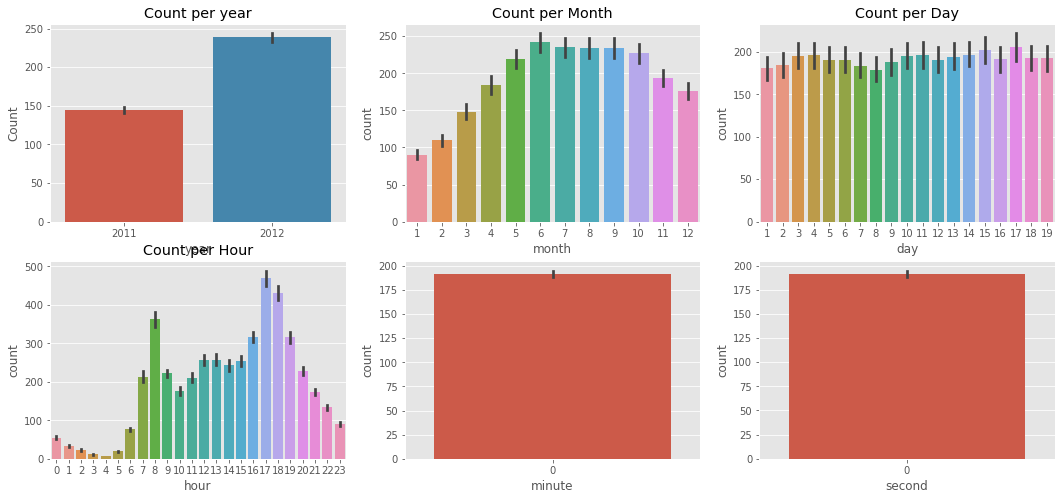

In [131]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=dailyData, x="year", y="count", ax=ax1)
sns.barplot(data=dailyData, x="month", y="count", ax=ax2)
sns.barplot(data=dailyData, x="day", y="count", ax=ax3)
sns.barplot(data=dailyData, x="hour", y="count", ax=ax4)
sns.barplot(data=dailyData, x="minute", y="count", ax=ax5)
sns.barplot(data=dailyData, x="second", y="count", ax=ax6)

ax1.set(ylabel='Count',title="Count per year")
ax2.set(xlabel='month',title="Count per Month")
ax3.set(xlabel='day', title="Count per Day")
ax4.set(xlabel='hour', title="Count per Hour")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Working Count')]

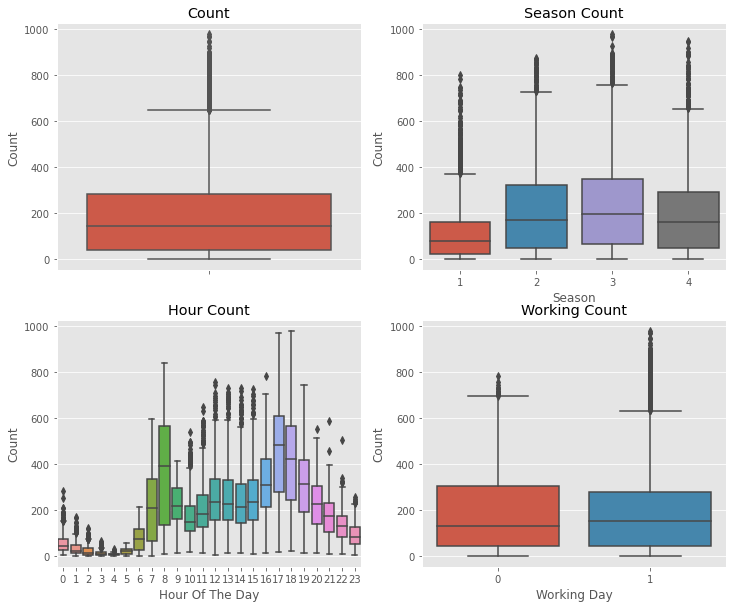

In [35]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=dailyData,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=dailyData,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=dailyData,y="count",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=dailyData,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Season Count")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Hour Count")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Working Count")

In [113]:
dailyData["dayofweek"] = dailyData["datetime"].dt.dayofweek
dailyData.shape

(10886, 19)

In [114]:
dailyData["dayofweek"].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

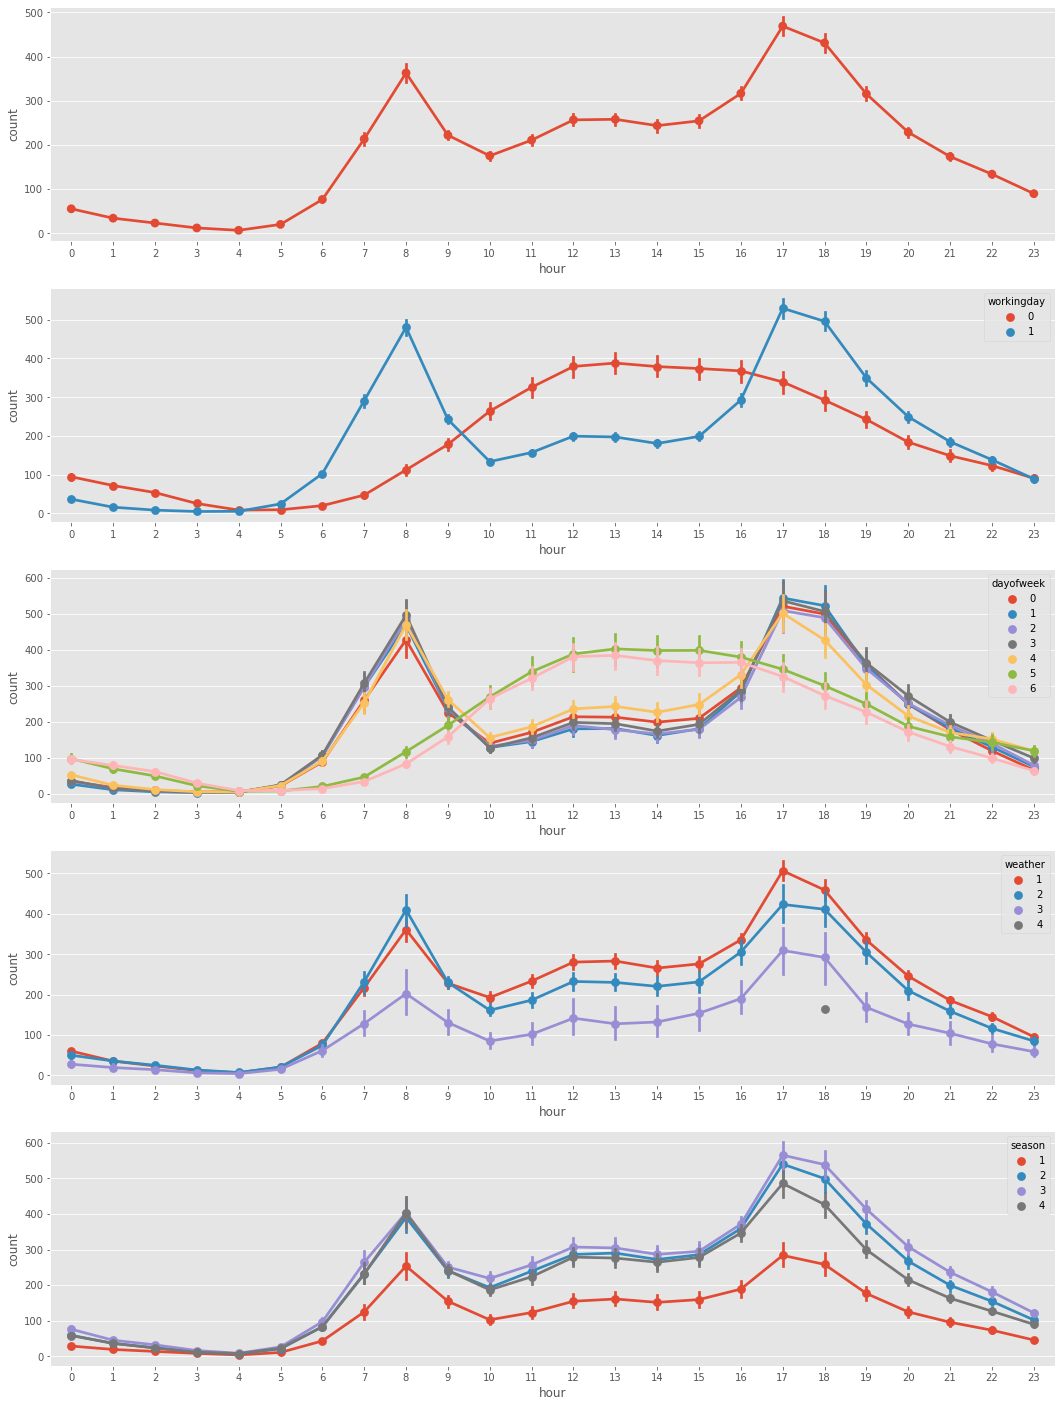

In [115]:
fig,(ax1,ax2,ax3,ax4,ax5)= plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=dailyData, x="hour", y="count", ax=ax1)

sns.pointplot(data=dailyData, x="hour", y="count", hue="workingday", ax=ax2)

sns.pointplot(data=dailyData, x="hour", y="count", hue="dayofweek", ax=ax3)

sns.pointplot(data=dailyData, x="hour", y="count", hue="weather", ax=ax4)

sns.pointplot(data=dailyData, x="hour", y="count", hue="season", ax=ax5)

In [116]:
dailyData.groupby('workingday').mean()

,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
workingday,,,,,,,,,,,,,,
0,19.889839,23.349837,62.192286,13.802980,59.308290,129.198330,188.506621,2011.503742,6.538572,9.913932,11.513529,0.0,0.0,5.075993
1,20.390696,23.798153,61.743119,14.115235,25.107663,167.904209,193.011873,2011.501079,6.513492,10.029412,11.554776,0.0,0.0,2.047491


In [117]:
dailyData['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [118]:
np.unique(dailyData['workingday'])

array([0, 1])

In [119]:
corrMatt = dailyData[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]
corrMatt = corrMatt.corr()
mask = np.array(corrMatt)
mask

array([[ 1.        ,  0.98494811,  0.46709706,  0.31857128, -0.06494877,
         0.0058684 ,  0.39445364],
       [ 0.98494811,  1.        ,  0.46206654,  0.31463539, -0.04353571,
        -0.03089408,  0.38978444],
       [ 0.46709706,  0.46206654,  1.        ,  0.49724969, -0.3481869 ,
         0.10972674,  0.69041357],
       [ 0.31857128,  0.31463539,  0.49724969,  1.        , -0.26545787,
         0.09307592,  0.97094811],
       [-0.06494877, -0.04353571, -0.3481869 , -0.26545787,  1.        ,
        -0.34267748, -0.31737148],
       [ 0.0058684 , -0.03089408,  0.10972674,  0.09307592, -0.34267748,
         1.        ,  0.10787025],
       [ 0.39445364,  0.38978444,  0.69041357,  0.97094811, -0.31737148,
         0.10787025,  1.        ]])

In [121]:
mask[np.tril_indices_from(mask)] = False 
mask

array([[ 0.        ,  0.98494811,  0.46709706,  0.31857128, -0.06494877,
         0.0058684 ,  0.39445364],
       [ 0.        ,  0.        ,  0.46206654,  0.31463539, -0.04353571,
        -0.03089408,  0.38978444],
       [ 0.        ,  0.        ,  0.        ,  0.49724969, -0.3481869 ,
         0.10972674,  0.69041357],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.26545787,
         0.09307592,  0.97094811],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.34267748, -0.31737148],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.10787025],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

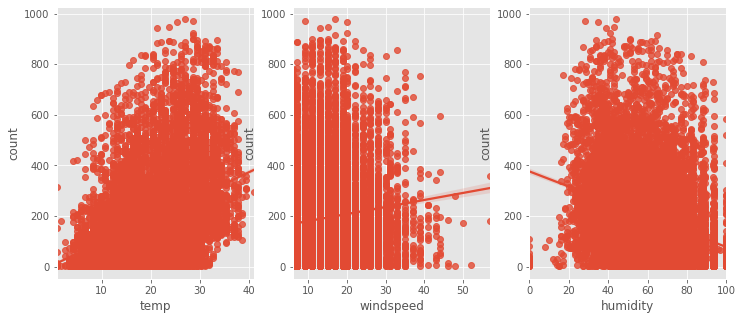

In [122]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x="temp", y="count", data=dailyData,ax=ax1)
sns.regplot(x="windspeed", y="count", data=dailyData,ax=ax2)
sns.regplot(x="humidity", y="count", data=dailyData,ax=ax3)

In [123]:
# trainWithoutOutliers
trainWithoutOutliers = dailyData[np.abs(dailyData["count"] - dailyData["count"].mean()) <= (3*dailyData["count"].std())]

print(dailyData.shape)
print(trainWithoutOutliers.shape)

(10886, 19)
(10739, 19)


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229776, 4.562423868087808, 0.9581176780909612))

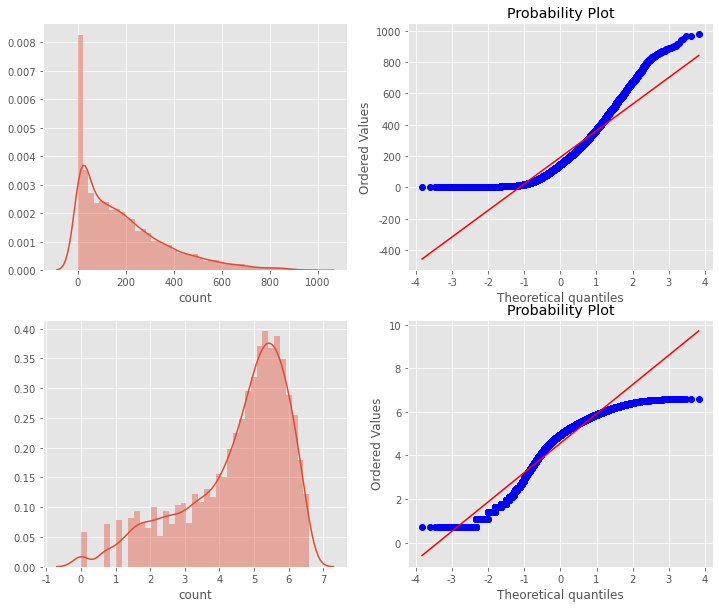

In [124]:

figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12, 10)

sns.distplot(dailyData["count"], ax=axes[0][0])
stats.probplot(dailyData["count"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(trainWithoutOutliers["count"]), ax=axes[1][0])
stats.probplot(np.log1p(trainWithoutOutliers["count"]), dist='norm', fit=True, plot=axes[1][1])

In [125]:
test = pd.read_csv("data/test.csv", parse_dates=["datetime"])
test.shape

(6493, 9)

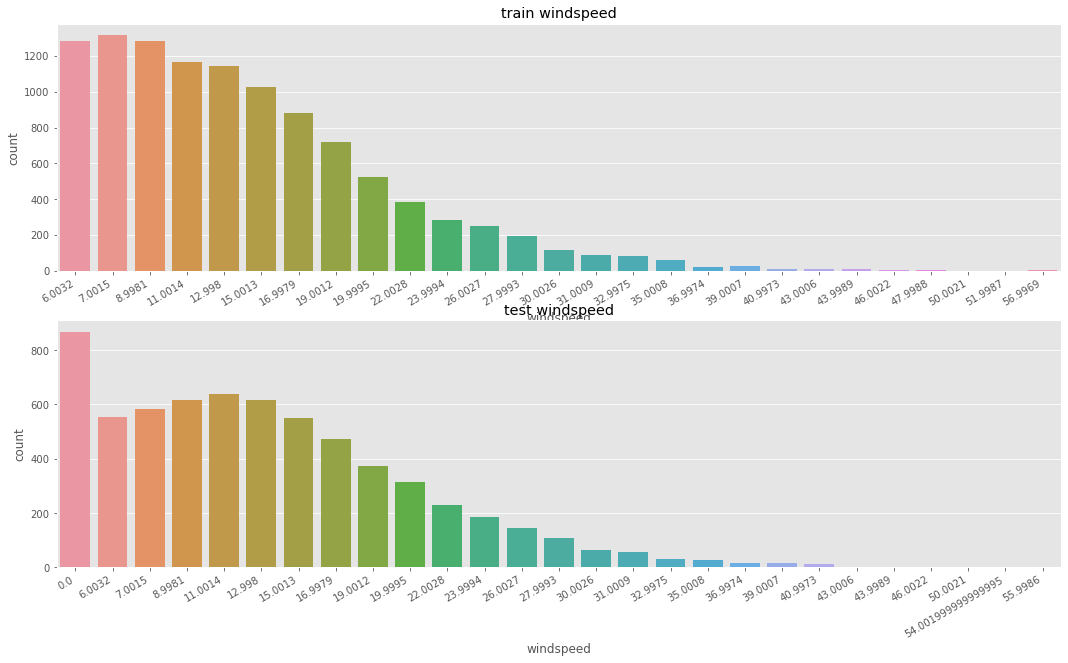

In [137]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(18,10)

plt.sca(axes[0])
plt.xticks(rotation=30, ha='right')
axes[0].set(ylabel='Count',title="train windspeed")
sns.countplot(data=dailyData, x="windspeed", ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation=30, ha='right')
axes[1].set(ylabel='Count',title="test windspeed")
sns.countplot(data=test, x="windspeed", ax=axes[1])


In [127]:
trainWind0 = train.loc[train['windspeed'] == 0]
trainWindNot0 = train.loc[train['windspeed'] != 0]
print(trainWind0.shape)
print(trainWindNot0.shape)

(1313, 13)
(9573, 13)


In [135]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier why? 흠..

def predict_windspeed(data):
    
    # 풍속이 0인것과 아닌 것을 나누어 준다.
    dataWind0 = data.loc[data['windspeed'] == 0]
    dataWindNot0 = data.loc[data['windspeed'] != 0]
    
    # 풍속을 예측할 피처를 선택한다.
    wCol = ["season", "weather", "humidity", "month", "temp", "year", "atemp"]

    # 풍속이 0이 아닌 데이터들의 타입을 스트링으로 바꿔준다.
    dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")

    # 랜덤포레스트 분류기를 사용한다.
    rfModel_wind = RandomForestClassifier()

    # wCol에 있는 피처의 값을 바탕으로 풍속을 학습시킨다.
    rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0["windspeed"])

    # 학습한 값을 바탕으로 풍속이 0으로 기록 된 데이터의 풍속을 예측한다.
    wind0Values = rfModel_wind.predict(X = dataWind0[wCol])

    # 값을 다 예측 후 비교해 보기 위해
    # 예측한 값을 넣어 줄 데이터 프레임을 새로 만든다.
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0

    # 값이 0으로 기록 된 풍속에 대해 예측한 값을 넣어준다.
    predictWind0["windspeed"] = wind0Values

    # dataWindNot0 0이 아닌 풍속이 있는 데이터프레임에 예측한 값이 있는 데이터프레임을 합쳐준다.
    data = predictWindNot0.append(predictWind0)

    # 풍속의 데이터타입을 float으로 지정해 준다.
    data["windspeed"] = data["windspeed"].astype("float")

    data.reset_index(inplace=True)
    data.drop('index', inplace=True, axis=1)
    
    return data

In [133]:
dailyData

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,0,0,5
1,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36,2011,1,1,10,0,0,5
2,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,56,2011,1,1,11,0,0,5
3,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,84,2011,1,1,12,0,0,5
4,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94,2011,1,1,13,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-17 12:00:00,4,0,1,2,16.40,20.455,87,7.0015,21,211,232,2012,12,17,12,0,0,0
10882,2012-12-17 15:00:00,4,0,1,2,17.22,21.210,88,8.9981,15,196,211,2012,12,17,15,0,0,0
10883,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,6.0032,10,652,662,2012,12,18,8,0,0,1
10884,2012-12-18 22:00:00,4,0,1,1,13.94,16.665,49,6.0032,5,127,132,2012,12,18,22,0,0,1
